In [1]:
import tensorflow as tf
import tensorflow.keras as keras
print('Tensorflow version: {}'.format(tf.__version__))
print('Keras version: {}'.format(keras.__version__))

Tensorflow version: 2.3.3
Keras version: 2.4.0


In [2]:
## get all needed dir for convert
import os

MODELS_KERAS_DIR = r'3_models/models_keras/'
MODELS_TFLITE_DIR = r'3_models/models_tflite/'
MODELS_TFLITE_DEFAULT_DIR = r'3_models/models_tflite_default/'
MODELS_TFLITE_SIZE_DIR = r'3_models/models_tflite_size/'

print("Available models: ")
for model in [item for item in os.listdir(MODELS_KERAS_DIR) if ('.h5' in item)]:
    print(model)

Available models: 
DenseNet201.h5
InceptionV3.h5
Model1.h5
Model2.h5
Xception.h5


In [3]:
## convert model to tflite (optional)
import time

def convert_model_to_tflite(model_path, des_path, optimize=None):
    start_time = time.time()
    # check path
    if not os.path.exists(model_path):
        print('Save path does not exist!') # if path not exists
    
    # get name model
    filename = os.path.splitext(os.path.basename(model_path))[0]
    
    # load model keras model file h5
    keras_model = tf.keras.models.load_model(model_path)
    
    # convert from keras model (.h5) to tflite model (.tflite)
    converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
    if optimize == 'DEFAULT':
        converter.optimizations = [tf.lite.Optimize.DEFAULT]
        print('Optimize: DEFAULT')
    elif optimize == 'OPTIMIZE_FOR_SIZE':
        converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
        print('Optimize: OPTIMIZE_FOR_SIZE')
    tflite_model = converter.convert()
        
    # write to tflite model file
    with open(os.path.join(des_path, '{}.tflite'.format(filename)), 'wb') as f:
        f.write(tflite_model)
    
    end_time = time.time() - start_time
    # notify successfully
    print('Successfully converted model {} - convert time: {}'.format(filename, str(round(end_time, 2))))

In [4]:
# convert all available model in folder
def convert_all_model(src_path, des_path, optimize=None):
    list_models = list(filter(lambda model: '.h5' in model, os.listdir(src_path))) 
    for model in list_models:
        model_path = os.path.join(src_path, model)
        convert_model_to_tflite(model_path, des_path, optimize=optimize)

In [5]:
## Option new convert
import shutil

new_convert = True

In [6]:
## convert model with not optimize
if new_convert and os.path.exists(MODELS_TFLITE_DIR):
    shutil.rmtree(MODELS_TFLITE_DIR)

if new_convert:
    os.mkdir(MODELS_TFLITE_DIR)
    convert_all_model(MODELS_KERAS_DIR, MODELS_TFLITE_DIR)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmpn35_yev2\assets
Successfully converted model DenseNet201 - convert time: 200.63
INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmpqhdh373k\assets


INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmpqhdh373k\assets


Successfully converted model InceptionV3 - convert time: 96.57
INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmp8b0fd0ow\assets


INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmp8b0fd0ow\assets


Successfully converted model Model1 - convert time: 4.39
INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmpdx9zttwk\assets


INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmpdx9zttwk\assets


Successfully converted model Model2 - convert time: 29.62
INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmpao1zbc35\assets


INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmpao1zbc35\assets


Successfully converted model Xception - convert time: 60.31


In [7]:
## convert model with optimize DEFAULT
if new_convert and os.path.exists(MODELS_TFLITE_DEFAULT_DIR):
    shutil.rmtree(MODELS_TFLITE_DEFAULT_DIR)

if new_convert:
    os.mkdir(MODELS_TFLITE_DEFAULT_DIR)
    convert_all_model(MODELS_KERAS_DIR, MODELS_TFLITE_DEFAULT_DIR, optimize='DEFAULT')

Optimize: DEFAULT
INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmptkti5vsv\assets


INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmptkti5vsv\assets


Successfully converted model DenseNet201 - convert time: 228.47
Optimize: DEFAULT
INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmpyluyii4y\assets


INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmpyluyii4y\assets


Successfully converted model InceptionV3 - convert time: 103.73
Optimize: DEFAULT
INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmpx186vkq3\assets


INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmpx186vkq3\assets


Successfully converted model Model1 - convert time: 6.78
Optimize: DEFAULT
INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmpmc3mw2ei\assets


INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmpmc3mw2ei\assets


Successfully converted model Model2 - convert time: 34.0
Optimize: DEFAULT
INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmplsgi7ebq\assets


INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmplsgi7ebq\assets


Successfully converted model Xception - convert time: 66.35


In [8]:
## convert model with optimize SIZE
if new_convert and os.path.exists(MODELS_TFLITE_SIZE_DIR):
    shutil.rmtree(MODELS_TFLITE_SIZE_DIR)

if new_convert:
    os.mkdir(MODELS_TFLITE_SIZE_DIR)
    convert_all_model(MODELS_KERAS_DIR, MODELS_TFLITE_SIZE_DIR, optimize='OPTIMIZE_FOR_SIZE')

Optimize: OPTIMIZE_FOR_SIZE
INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmp98_sfvbe\assets


INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmp98_sfvbe\assets


Successfully converted model DenseNet201 - convert time: 247.27
Optimize: OPTIMIZE_FOR_SIZE
INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmp5t9a7qji\assets


INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmp5t9a7qji\assets


Successfully converted model InceptionV3 - convert time: 126.17
Optimize: OPTIMIZE_FOR_SIZE
INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmpzrsm6dd0\assets


INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmpzrsm6dd0\assets


Successfully converted model Model1 - convert time: 4.16
Optimize: OPTIMIZE_FOR_SIZE
INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmpbm3xu88j\assets


INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmpbm3xu88j\assets


Successfully converted model Model2 - convert time: 27.45
Optimize: OPTIMIZE_FOR_SIZE
INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmp17j5fnwr\assets


INFO:tensorflow:Assets written to: C:\Users\tranm\AppData\Local\Temp\tmp17j5fnwr\assets


Successfully converted model Xception - convert time: 58.12


In [9]:
## load all available keras model
import time
from tqdm import tqdm
from tensorflow.keras.models import load_model

def load_keras_models(models_dir=''):
    models = dict({})
    time_load_model = []
    
    for model in tqdm(os.listdir(models_dir)):
        # get model name
        model_name = model.split('.')[0]
        # get model path
        model_path = os.path.join(models_dir, model)
        # load model
        start_time = time.time()
        models[model_name] = load_model(model_path)
        end_time = time.time() - start_time
        time_load_model.append(end_time)
        # show message successfully
        print('Load model {} successfully in {}s!'.format(model_name, round(end_time, 2)))
    # return results
    return models, time_load_model

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def show_time_load_models(model_names, time_load_models, title='Time load models'):
    plt.figure(figsize=(7, 5))
    plt.bar(model_names, time_load_models, color=plt.cm.Set2(np.arange(len(time_load_models))))
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.5)
    plt.title(title)
    plt.ylabel('Time (seconds)')
    plt.xlabel('Model')
    plt.show()

 20%|████████████████▊                                                                   | 1/5 [00:24<01:37, 24.27s/it]

Load model DenseNet201 successfully in 24.27s!


 40%|█████████████████████████████████▌                                                  | 2/5 [00:36<00:51, 17.01s/it]

Load model InceptionV3 successfully in 11.92s!


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:36<00:19,  9.54s/it]

Load model Model1 successfully in 0.63s!


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:41<00:07,  7.63s/it]

Load model Model2 successfully in 4.7s!


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:46<00:00,  9.39s/it]

Load model Xception successfully in 5.39s!

All model: dict_keys(['DenseNet201', 'InceptionV3', 'Model1', 'Model2', 'Xception'])


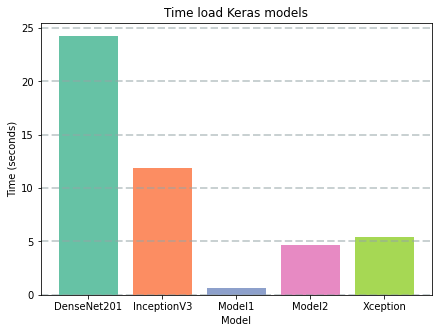

In [11]:
models, time_load_keras_model = load_keras_models(MODELS_KERAS_DIR)
print('\nAll model: {}'.format(models.keys()))
show_time_load_models(model_names=models.keys(), 
                      time_load_models=time_load_keras_model,
                      title='Time load Keras models')

In [12]:
def load_tflite_models(models_dir=''):
    models = dict({})
    time_load_model = []
    
    for model in tqdm(os.listdir(models_dir)):
        # get model name
        model_name = model.split('.')[0]
        # get model path
        model_path = os.path.join(models_dir, model)
        # load model
        start_time = time.time()
        model = tf.lite.Interpreter(model_path=model_path)
        model.allocate_tensors()
        models[model_name] = model
        end_time = time.time() - start_time
        time_load_model.append(end_time)
        # show message successfully
        print('Load model {} successfully in {}s!'.format(model_name, round(end_time, 2)))
    # return results
    return models, time_load_model

 20%|████████████████▊                                                                   | 1/5 [00:00<00:03,  1.14it/s]

Load model DenseNet201 successfully in 0.88s!


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:02<00:01,  1.72it/s]

Load model InceptionV3 successfully in 1.06s!
Load model Model1 successfully in 0.1s!


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:04<00:01,  1.17s/it]

Load model Model2 successfully in 2.07s!


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.04s/it]

Load model Xception successfully in 1.07s!

All model: dict_keys(['DenseNet201', 'InceptionV3', 'Model1', 'Model2', 'Xception'])


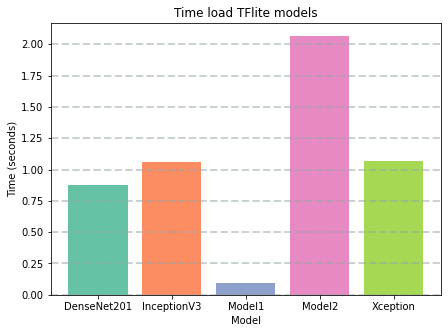

In [13]:
models_tflite, time_load_tflite_model = load_tflite_models(MODELS_TFLITE_DIR)
print('\nAll model: {}'.format(models_tflite.keys()))
show_time_load_models(model_names=models_tflite.keys(), 
                      time_load_models=time_load_tflite_model,
                      title='Time load TFlite models')

 20%|████████████████▊                                                                   | 1/5 [00:00<00:01,  3.33it/s]

Load model DenseNet201 successfully in 0.3s!


 40%|█████████████████████████████████▌                                                  | 2/5 [00:00<00:00,  3.13it/s]

Load model InceptionV3 successfully in 0.33s!
Load model Model1 successfully in 0.07s!
Load model Model2 successfully in 0.58s!


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.15it/s]

Load model Xception successfully in 0.3s!

All model: dict_keys(['DenseNet201', 'InceptionV3', 'Model1', 'Model2', 'Xception'])


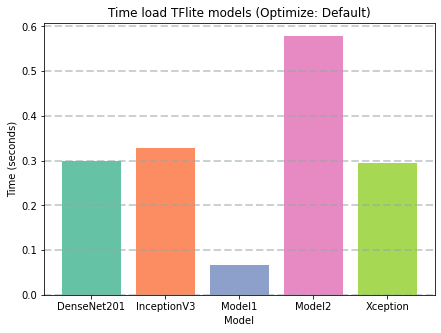

In [14]:
models_tflite_default, time_load_tflite_default_model = load_tflite_models(MODELS_TFLITE_DEFAULT_DIR)

print('\nAll model: {}'.format(models_tflite_default.keys()))
show_time_load_models(model_names=models_tflite_default.keys(), 
                      time_load_models=time_load_tflite_default_model,
                      title='Time load TFlite models (Optimize: Default)')

 20%|████████████████▊                                                                   | 1/5 [00:00<00:01,  2.57it/s]

Load model DenseNet201 successfully in 0.39s!


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.43it/s]

Load model InceptionV3 successfully in 0.36s!
Load model Model1 successfully in 0.03s!
Load model Model2 successfully in 0.07s!
Load model Xception successfully in 0.05s!

All model: dict_keys(['DenseNet201', 'InceptionV3', 'Model1', 'Model2', 'Xception'])


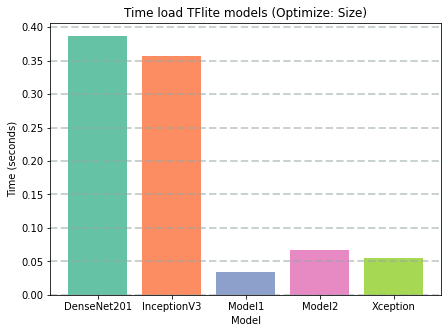

In [15]:
models_tflite_size, time_load_tflite_size_model = load_tflite_models(MODELS_TFLITE_SIZE_DIR)
print('\nAll model: {}'.format(models_tflite_size.keys()))
show_time_load_models(model_names=models_tflite_size.keys(), 
                      time_load_models=time_load_tflite_size_model,
                      title='Time load TFlite models (Optimize: Size)')

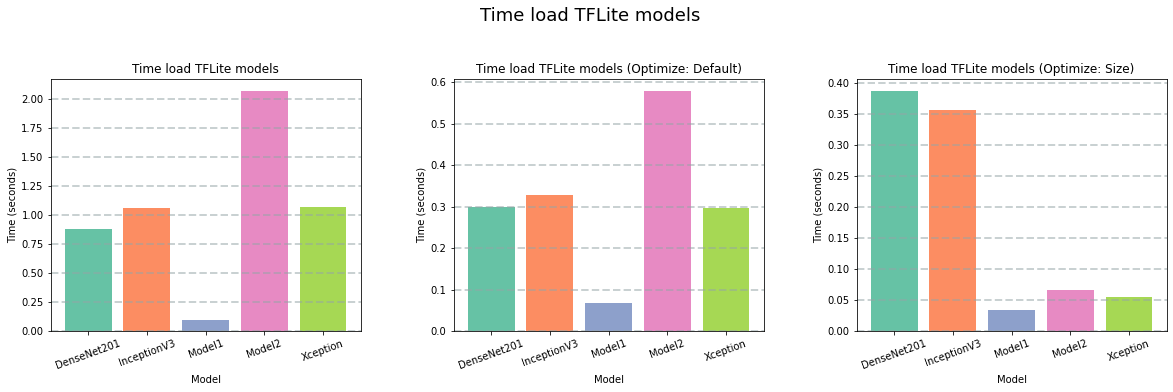

In [55]:
titles = ['Time load TFLite models', 
          'Time load TFLite models (Optimize: Default)', 
          'Time load TFLite models (Optimize: Size)']
models_name = [models_tflite.keys(), 
               models_tflite_default.keys(), 
               models_tflite_size.keys()]
time_loads = [time_load_tflite_model, 
              time_load_tflite_default_model, 
              time_load_tflite_size_model]

fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 1, 1]}, figsize=(20, 5))
fig.suptitle('Time load TFLite models', x=0.5, y=1.0, fontsize=18, ha="center")
color=plt.cm.Set2(np.arange(len(time_load_tflite_default_model)))

for index in range(0, 3):
    ax[index].set_title(titles[index])
    ax[index].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.5)
    ax[index].bar(models_name[index], time_loads[index], color=color)
    ax[index].set_ylabel('Time (seconds)')
    ax[index].set_xlabel('Model')
    plt.setp(ax[index].xaxis.get_majorticklabels(), rotation=20)

# ax[1].set_title('Time load TFLite models (Optimize: Default)')
# ax[1].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.5)
# ax[1].bar(models_tflite_default.keys(), time_load_tflite_default_model, color=color)
# ax[1].set_ylabel('Time (seconds)')
# ax[1].set_xlabel('Model')

# ax[2].set_title('Time load TFLite models (Optimize: Size)')
# ax[2].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.5)
# ax[2].bar(models_tflite_size.keys(), time_load_tflite_size_model, color=color)
# ax[2].set_ylabel('Time (seconds)')
# ax[2].set_xlabel('Model')
# ax[2].set_xticks(rotation=20)

plt.subplots_adjust(top=0.8, bottom=0.1,
                    left=0.125, right=0.9,
                    wspace=0.3, hspace=0.3)
plt.show()

In [17]:
time_load_keras_model

[24.271188974380493,
 11.92400598526001,
 0.6307969093322754,
 4.6957175731658936,
 5.392793416976929]

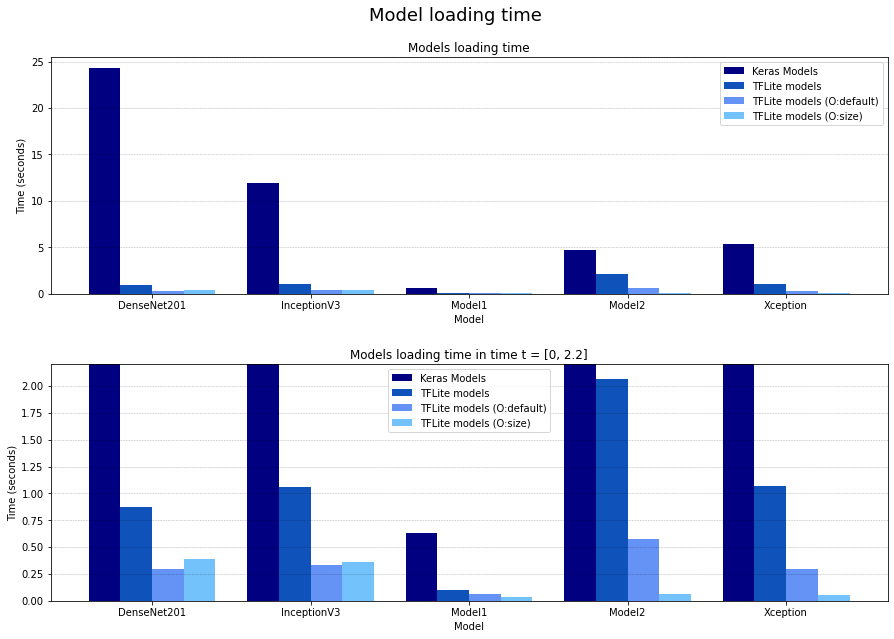

In [58]:
# Set plot parameters
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle('Model loading time', x=0.5, y=0.95, fontsize=18, ha="center")

all_time = [time_load_tflite_model, time_load_tflite_default_model, time_load_tflite_size_model]
time_zoom = np.round(np.max(all_time) + 0.1, 1)

width = 0.2 # width of bar
length = len(models_tflite.keys())
x = np.arange(length)
x_labels = models_tflite.keys()

for index in range(0, 2):
    ax[index].bar(x, time_load_keras_model, width, color='#000080', label='Keras Models')
    ax[index].bar(x + width, time_load_tflite_model, width, color='#0F52BA', label='TFLite models')
    ax[index].bar(x + (2 * width), time_load_tflite_default_model, width, color='#6593F5', label='TFLite models (O:default)')
    ax[index].bar(x + (3 * width), time_load_tflite_size_model, width, color='#73C2FB', label='TFLite models (O:size)')

    ax[index].set_title('Models loading time')
    ax[index].set_ylabel('Time (seconds)')
    ax[index].set_xticks(x + width + width/2)
    ax[index].set_xticklabels(x_labels)
    ax[index].set_xlabel('Model')
    ax[index].legend()
    ax[index].grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

ax[index].set_title('Models loading time in time t = [0, {}]'.format(str(time_zoom)))
ax[1].set_ylim(0, time_zoom)
plt.subplots_adjust(hspace=0.3)

# fig.tight_layout()
plt.show()

In [99]:
## load all available keras model
import time
from tqdm import tqdm

def get_size_models(models_dir=''):
    models_size = dict({})
    
    for model in tqdm(os.listdir(models_dir)):
        # get model name
        model_name = model.split('.')[0]
        # get model path
        model_path = os.path.join(models_dir, model)
        # get size
        models_size[model_name] = round(os.path.getsize(model_path) / 1024**2, 2)
        
    # return results
    return models_size

def show_size_models(model_names, models_size, title='Models size'):
    plt.figure(figsize=(7, 5))
    plt.bar(model_names, models_size, color=plt.cm.Set2(np.arange(len(models_size))))
    plt.grid(color='#95a5a6', linestyle='-.', linewidth=1, axis='y', alpha=0.3)
    plt.title(title)
    plt.ylabel('Size (Mb)')
    plt.xlabel('Model')
    plt.xticks(rotation=20)
    plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 2507.66it/s]


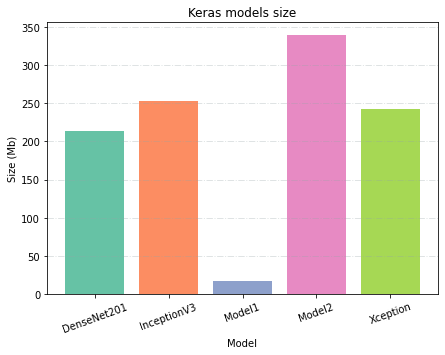

In [106]:
models_keras_size = get_size_models('3_models/models_keras/')
show_size_models(models_keras_size.keys(), models_keras_size.values(), title="Keras models size")

100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1671.04it/s]


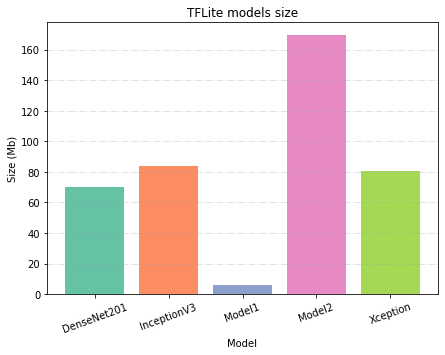

In [107]:
models_tflite_size = get_size_models('3_models/models_tflite/')
show_size_models(models_tflite_size.keys(), models_tflite_size.values(), title="TFLite models size")

100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 2505.86it/s]


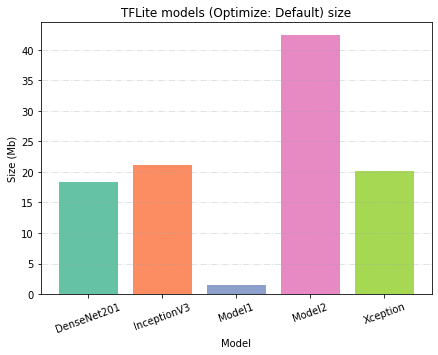

In [109]:
models_tflite_default_size = get_size_models('3_models/models_tflite_default/')
show_size_models(models_tflite_default_size.keys(), models_tflite_default_size.values(), 
                 title="TFLite models (Optimize: Default) size")

100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 2507.36it/s]


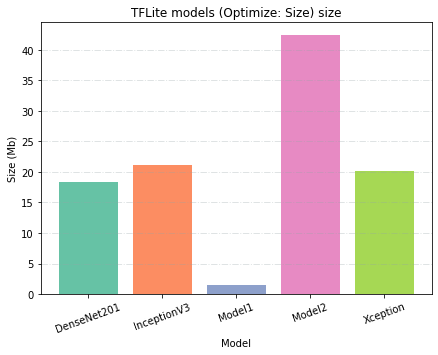

In [110]:
models_tflite_size_size = get_size_models('3_models/models_tflite_size/')
show_size_models(models_tflite_size_size.keys(), models_tflite_size_size.values(), 
                 title="TFLite models (Optimize: Size) size")

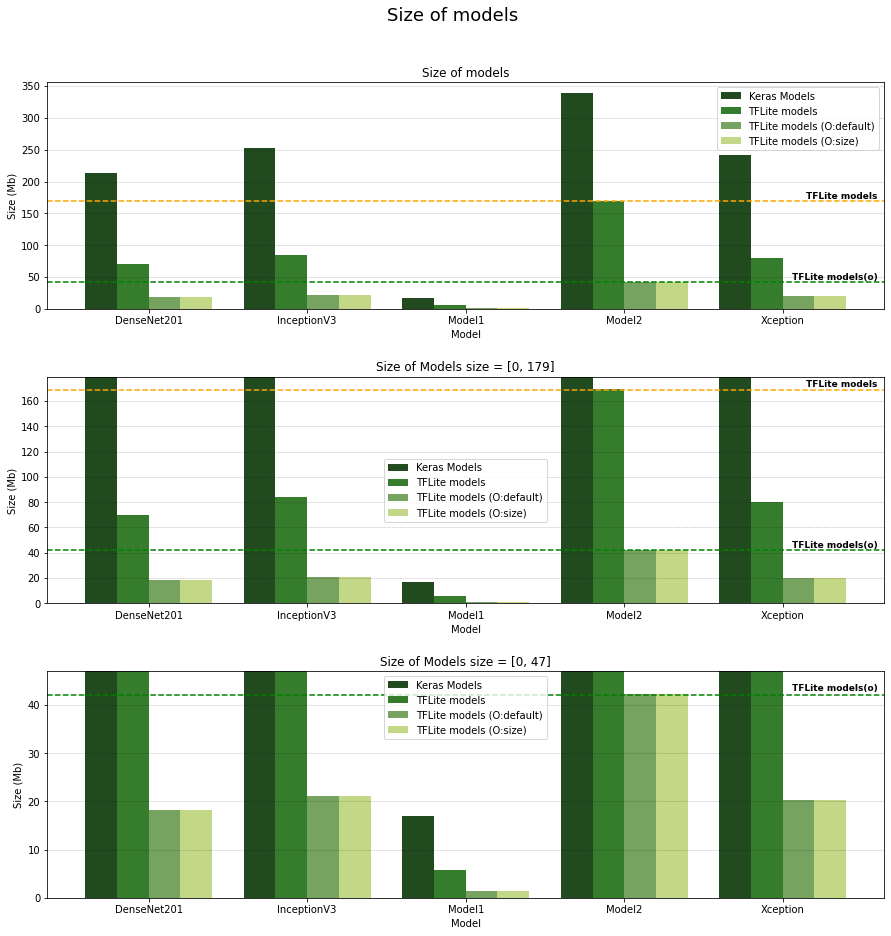

In [180]:
# Set plot parameters
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
fig.suptitle('Size of models', x=0.5, y=0.95, fontsize=18, ha="center")

max_time_optimize = round(max(max(models_tflite_default_size.values()), max(models_tflite_size_size.values())))

max_time_tflite = round(max(max(models_tflite_size.values()), max_time_optimize))

width = 0.2 # width of bar
length = len(models_tflite.keys())
x = np.arange(length)
x_labels = models_tflite.keys()

for index in range(0, 3):
    ax[index].bar(x, models_keras_size.values(), width, color='#224A1F', label='Keras Models')
    ax[index].bar(x + width, models_tflite_size.values(), width, color='#357C2D', label='TFLite models')
    ax[index].bar(x + (2 * width), models_tflite_default_size.values(), width, color='#77A361', label='TFLite models (O:default)')
    ax[index].bar(x + (3 * width), models_tflite_size_size.values(), width, color='#C3D886', label='TFLite models (O:size)')

    ax[index].axhline(max_time_tflite, color='orange', linestyle='--')
    if index < 2:
        ax[index].text(4.9, max_time_tflite+0.5, "TFLite models", 
                   horizontalalignment='right', verticalalignment='bottom', 
                   fontweight='bold', fontsize=9)
    ax[index].axhline(max_time_optimize, color='green', linestyle='--')
    ax[index].text(4.9, max_time_optimize+0.5, "TFLite models(o)", 
               horizontalalignment='right', verticalalignment='bottom', 
               fontweight='bold', fontsize=9)
    ax[index].set_title('Size of models')
    ax[index].set_ylabel('Size (Mb)')
    ax[index].set_xticks(x + width + width/2)
    ax[index].set_xticklabels(x_labels)
    ax[index].set_xlabel('Model')
    ax[index].legend()
    ax[index].grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

ax[1].set_title('Size of Models size = [0, {}]'.format(str(max_time_tflite + 10)))
ax[1].set_ylim(0, max_time_tflite + 10)

ax[2].set_title('Size of Models size = [0, {}]'.format(str(max_time_optimize + 5)))
ax[2].set_ylim(0, max_time_optimize + 5)
plt.subplots_adjust(hspace=0.3)

# fig.tight_layout()
plt.show()

In [19]:
## show all availiabel models
print('Available Keras models: {}'.format(models.keys())) # models
print('Available TFLite models: {}'.format(models_tflite.keys())) # models_tflite
print('Available TFLite models (Optimize: Default): {}'.format(models_tflite_default.keys())) # models_tflite_default
print('Available TFLite models (Optimize: Size): {}'.format(models_tflite_size.keys())) # models_tflite_size

Available Keras models: dict_keys(['DenseNet201', 'InceptionV3', 'Model1', 'Model2', 'Xception'])
Available TFLite models: dict_keys(['DenseNet201', 'InceptionV3', 'Model1', 'Model2', 'Xception'])
Available TFLite models (Optimize: Default): dict_keys(['DenseNet201', 'InceptionV3', 'Model1', 'Model2', 'Xception'])
Available TFLite models (Optimize: Size): dict_keys(['DenseNet201', 'InceptionV3', 'Model1', 'Model2', 'Xception'])


In [20]:
## get label and list sample test processed dataset to testing
samples_dir = r'1_datasets/processed_dataset/test'

# get labels
labels = sorted(os.listdir(samples_dir))
print('Labels of datasets: {}\n'.format(labels))

# get list sample
import pandas as pd
from tqdm import tqdm

def get_samples():
    list_sample = []
    for label in os.listdir(samples_dir):
        label_dir = os.path.join(samples_dir, label)
        for file in tqdm(os.listdir(label_dir)):
            file_path = os.path.join(label_dir, file)
            file_path = file_path.replace('\\', '/')
            list_sample.append([file_path, label])
    return pd.DataFrame(list_sample, columns=['image', 'label'])

list_sample = get_samples()
list_sample.head()

100%|█████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 71641.17it/s]

Labels of datasets: ['ArtDecor', 'Hitech', 'Indochina', 'Industrial', 'Scandinavian']




100%|█████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 62665.15it/s]


,image,label
0,1_datasets/processed_dataset/test/ArtDecor/Art...,ArtDecor
1,1_datasets/processed_dataset/test/ArtDecor/Art...,ArtDecor
2,1_datasets/processed_dataset/test/ArtDecor/Art...,ArtDecor
3,1_datasets/processed_dataset/test/ArtDecor/Art...,ArtDecor
4,1_datasets/processed_dataset/test/ArtDecor/Art...,ArtDecor


In [42]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img ,img_to_array

train_datagen = ImageDataGenerator(rescale=1.0/255)

example_df = list_sample.sample(n=3).reset_index(drop=True)

example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    '',
    x_col="image",
    y_col="label",
    target_size=(224, 224),
    class_mode='sparse',
    shuffle=False
)

example_df.head()

Found 3 validated image filenames belonging to 2 classes.


,image,label
0,1_datasets/processed_dataset/test/ArtDecor/Art...,ArtDecor
1,1_datasets/processed_dataset/test/Indochina/In...,Indochina
2,1_datasets/processed_dataset/test/Indochina/In...,Indochina


In [43]:
images = next(iter(example_generator))[0]
start = time.time()
preditions = models['Xception'].predict(images)
end = time.time() - start
print(end)

[np.round(s, 2) for s in preditions]

0.6055474281311035


[array([1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., 0., 0.], dtype=float32),
 array([0., 0., 1., 0., 0.], dtype=float32)]

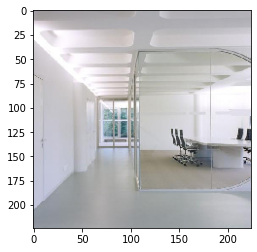

In [23]:
for X_batch, Y_batch in example_generator:
    image = X_batch[0]
    plt.imshow(image)
    break

In [62]:
images = next(iter(example_generator))[0]
start = time.time()
input_details = models_tflite['Model1'].get_input_details()
output_details = models_tflite['Model1'].get_output_details()

if len(images) > 1:
    models_tflite['Model1'].resize_tensor_input(input_details[0]['index'], (len(images), 224, 224, 3))
    models_tflite['Model1'].resize_tensor_input(output_details[0]['index'], (len(images), 5))
    models_tflite['Model1'].allocate_tensors()

models_tflite['Model1'].set_tensor(input_details[0]['index'], images)
models_tflite['Model1'].invoke()
output = models_tflite['Model1'].get_tensor(output_details[0]['index'])
end = time.time() - start

print(end)
# print(output * 100)
[np.round(s, 2) for s in output]

1.8148353099822998


[array([0.85, 0.15, 0.  , 0.  , 0.01], dtype=float32),
 array([0., 0., 1., 0., 0.], dtype=float32),
 array([0.25, 0.14, 0.47, 0.14, 0.01], dtype=float32)]

In [25]:
next(iter(example_generator))[0].shape

(3, 224, 224, 3)

In [61]:
images = next(iter(example_generator))[0]
start = time.time()
input_details = models_tflite_default['Model1'].get_input_details()
output_details = models_tflite_default['Model1'].get_output_details()

if len(images) > 1:
    models_tflite_default['Model1'].resize_tensor_input(input_details[0]['index'], (len(images), 224, 224, 3))
    models_tflite_default['Model1'].resize_tensor_input(output_details[0]['index'], (len(images), 5))
    models_tflite_default['Model1'].allocate_tensors()

models_tflite_default['Model1'].set_tensor(input_details[0]['index'], images)
models_tflite_default['Model1'].invoke()
output = models_tflite_default['Model1'].get_tensor(output_details[0]['index'])
end = time.time() - start

print(end)
# print(output * 100)
[np.round(s, 2) for s in output]

14.932081937789917


[array([0.84, 0.15, 0.  , 0.  , 0.01], dtype=float32),
 array([0., 0., 1., 0., 0.], dtype=float32),
 array([0.23, 0.15, 0.48, 0.13, 0.01], dtype=float32)]

In [27]:
next(iter(example_generator))[0].shape

(3, 224, 224, 3)

In [28]:
images = next(iter(example_generator))[0]
start = time.time()
input_details = models_tflite_size['Xception'].get_input_details()
output_details = models_tflite_size['Xception'].get_output_details()

if len(images) > 1:
    models_tflite_size['Xception'].resize_tensor_input(input_details[0]['index'], (len(images), 224, 224, 3))
    models_tflite_size['Xception'].resize_tensor_input(output_details[0]['index'], (len(images), 5))
    models_tflite_size['Xception'].allocate_tensors()

models_tflite_size['Xception'].set_tensor(input_details[0]['index'], images)
models_tflite_size['Xception'].invoke()
output = models_tflite_size['Xception'].get_tensor(output_details[0]['index'])
end = time.time() - start

print(end)
# print(output * 100)
[np.round(s, 2) for s in output]

6.632592439651489


[array([0., 1., 0., 0., 0.], dtype=float32),
 array([0.02, 0.  , 0.  , 0.82, 0.16], dtype=float32),
 array([0.99, 0.  , 0.01, 0.  , 0.  ], dtype=float32)]

In [29]:
image = resize_image(example_df.image[0])
plt.imshow(image)
print(image.shape)
print(image[0])

NameError: name 'resize_image' is not defined

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflowjs as tfjs
import numpy as np
import pandas as pd
import sys

In [ ]:
# load model keras model file h5
keras_model = tf.keras.models.load_model('models/Model_Xception_224x224.h5')
tfjs.converters.save_keras_model(keras_model, 'models_')

In [ ]:
import tensorflow as tf
import time

start = time.time()
model = tf.lite.Interpreter(model_path="models_tflite/Model_Xception_224x224.tflite")
model.allocate_tensors()
end = time.time() - start
print(end)

In [ ]:
import cv2

def getimage(path):
    img_size=224
    img = cv2.imread(path)
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.show()
    img_size=224
    img = cv2.resize(img,(img_size,img_size),3)
    img = np.array(img) / 255
    img = np.array(img)
    img = img.reshape(1, img_size, img_size, 3).astype(np.float32)
    return img

In [ ]:
ls 3_models\models_keras\Xception.h5

In [ ]:
keras_model = tf.keras.models.load_model('3_models\models_keras\Xception.h5')
    
# convert from keras model (.h5) to tflite model (.tflite)
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

In [ ]:

# write to tflite model file
with open(os.path.join('{}.tflite'.format("Xception")), 'wb') as f:
    f.write(tflite_model)
    

In [ ]:
model_ = tf.lite.Interpreter(model_path="Xception.tflite")
model_.allocate_tensors()

In [ ]:
image = next(iter(example_generator))[0]
image

In [ ]:
input_details = model_.get_input_details()
output_details = model_.get_output_details()
model_.set_tensor(input_details[0]['index'], image)
model_.invoke()
output = model_.get_tensor(output_details[0]['index'])

In [ ]:
output